# t-SNE

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## 1. Digits dataset

In [15]:
# Load data
digits = load_digits()
X = digits.data.astype(np.float64)
y = digits.target.astype(int)

In [4]:
# Feature scaling
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

In [8]:
Xs.shape

(1797, 64)

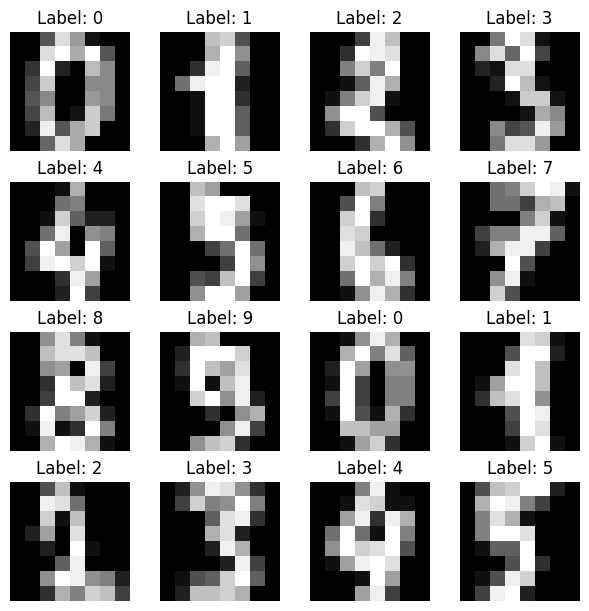

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6), constrained_layout=True)
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Label: {y[i]}")
    ax.axis("off")
plt.show()

In [ ]:
# PCA
pca_2d = PCA(n_components=2, random_state=42)
Z_pca_2d = pca_2d.fit_transform(Xs)

In [ ]:
# t-SNE

tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    init="pca",      
    learning_rate="auto",
    random_state=random_state,
)
Z_tsne_2d = tsne.fit_transform(Xs)

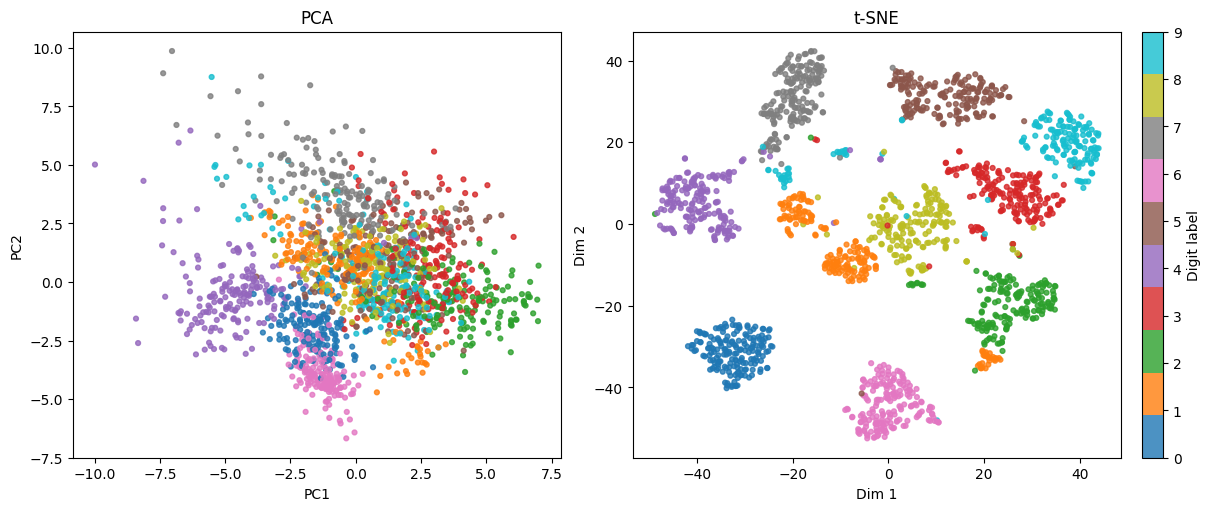

In [ ]:
cmap = cmap = ListedColormap(plt.cm.tab10.colors)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

sc0 = axes[0].scatter(Z_pca[:, 0], Z_pca[:, 1], c=y, s=12, alpha=0.8, cmap=cmap)
axes[0].set_title("PCA")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

sc1 = axes[1].scatter(Z_tsne[:, 0], Z_tsne[:, 1], c=y, s=12, alpha=0.8, cmap=cmap)
axes[1].set_title("t-SNE")
axes[1].set_xlabel("Dim 1")
axes[1].set_ylabel("Dim 2")

cbar = fig.colorbar(sc1, ax=axes, fraction=0.03, pad=0.02)
cbar.set_label("Digit label")

plt.show()

## 2. Olivetti Faces dataset

Link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [28]:
# USe t-SNE for 2D visualization a dataset of human faces
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
images = faces.images
X_faces = faces.data.astype(np.float64)
y_faces = faces.target.astype(int)

In [34]:
np.unique(y_faces)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

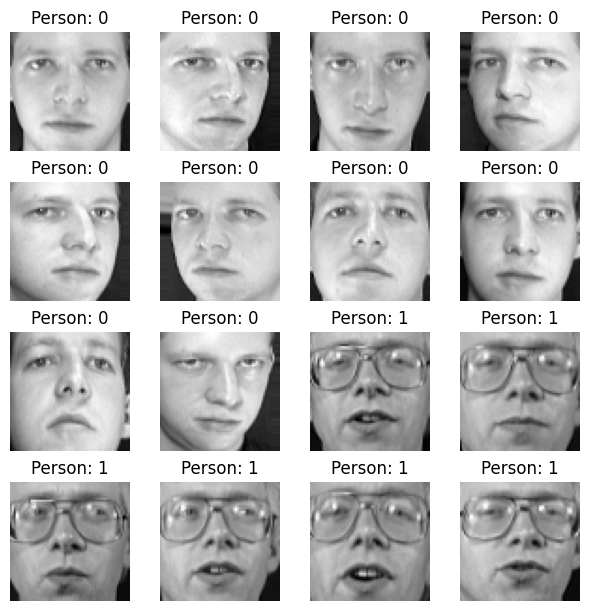

In [29]:
# Plot some faces
fig, axes = plt.subplots(4, 4, figsize=(6, 6), constrained_layout=True)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_faces[i].reshape(64, 64), cmap="gray")
    ax.set_title(f"Person: {y_faces[i]}")
    ax.axis("off")
plt.show()

/var/folders/2h/fcmq37vd01z2y2xm70ljzmz00000gn/T/ipykernel_24651/1542718494.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_faces = ListedColormap(plt.cm.get_cmap("tab20").colors)


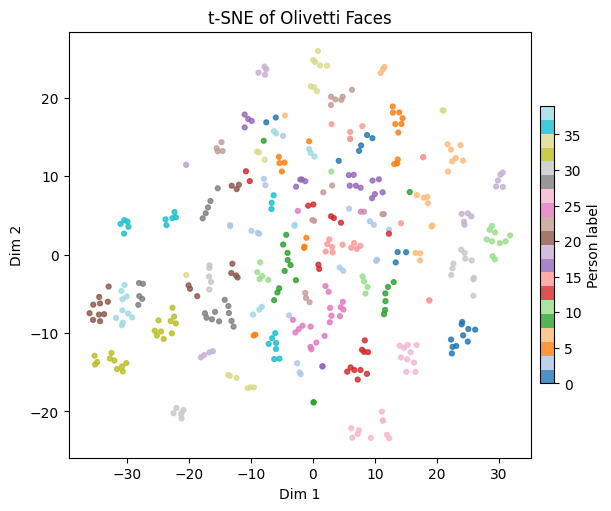

In [30]:
# Use t-SNE for 2D visualization
tsne_faces = TSNE(
    n_components=2,
    perplexity=30.0,
    init="pca",      
    learning_rate="auto",
    random_state=random_state,
)
Z_tsne_faces_2d = tsne_faces.fit_transform(X_faces)

cmap_faces = ListedColormap(plt.cm.get_cmap("tab20").colors)

fig, ax = plt.subplots(figsize=(6, 5), constrained_layout=True)
sc_faces = ax.scatter(
    Z_tsne_faces_2d[:, 0],
    Z_tsne_faces_2d[:, 1],
    c=y_faces,
    s=12,
    alpha=0.8,
    cmap=cmap_faces,
)
ax.set_title("t-SNE of Olivetti Faces")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")

cbar_faces = fig.colorbar(sc_faces, ax=ax, fraction=0.03, pad=0.02)
cbar_faces.set_label("Person label")
plt.show()